In [78]:
import numpy as np
import matplotlib.pyplot as plt
import scipy                  # http://scipy.org/
from scipy import signal

from scipy.fftpack import fft, fftfreq

from IPython.display import Image  
%matplotlib inline
params = {'legend.fontsize': 14,
          'figure.figsize': (6, 6),
         'axes.labelsize': 14,
         'axes.titlesize': 14,
         'xtick.labelsize':14,
         'ytick.labelsize':14}
plt.rcParams.update(params) 

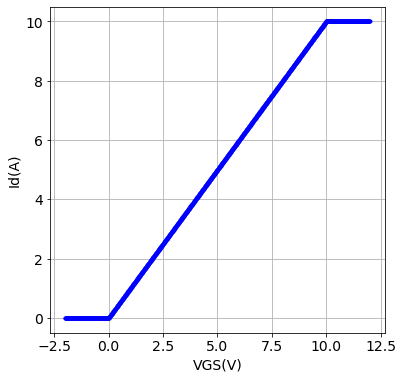

In [102]:
# Defino la transferencia del dispositivo
def idi(v):
    i =  0.             if (v < 0) else 0
    i = (1)*(v) if (v >= 0  and v < 10) else i
    i = (10) if (v >= 10  ) else i
    return i


# Grafico para verificar!
vgsa = np.arange(-2,12,0.01)
idsa = np.array([idi(v) for v in vgsa])

plt.plot(vgsa,idsa,'b.')
#plt.axis([0, 4, 0, 4.5])
plt.grid()
plt.ylabel('Id(A)')
plt.xlabel('VGS(V)')
plt.show()

In [80]:
# Tensión Fuente
VDD  = 110
# Tension minima 
Vmin = 10
# Tension entrada 
VGG = -5
vg  = 15

# Filtro salida
Qo  = np.inf
Qc  = 10

# Frecuencia de trabajo
fc = 1e6
RL = 50
Ri = 50

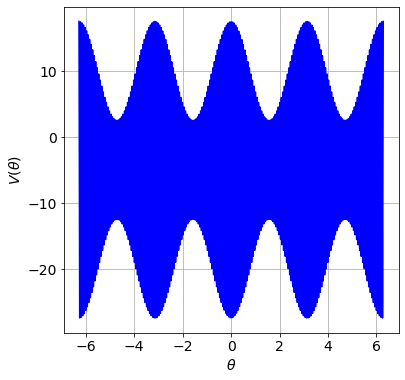

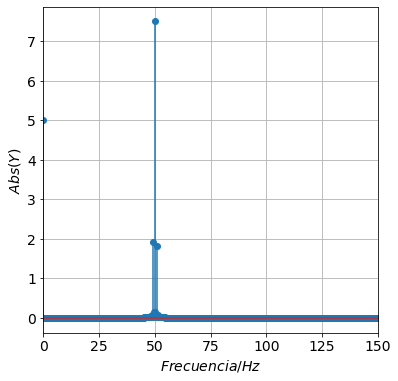

In [152]:
# Tensión entrada
# defino el sampleo
n  = 10000
m = 0.5
# vector de tiempo 
t  = np.linspace(0, 4, num=n)
ds = t[1]

vgs = VGG + vg*(1+m*np.cos(2*np.pi*t)) * np.cos(2*np.pi*t*50)



plt.plot(th, vgs,'b-')
#plt.axis([0, 4, 0, 4.5])
plt.grid()
plt.ylabel('$V(\\theta)$')
plt.xlabel('$\\theta$')
plt.show()

Yv = fft(vgs)/len(vgs)  # Normalizada
#S = np.fft.fftshift(np.fft.fft(s))
#S_mag = np.abs(S)
#S_phase = np.angle(S)


frq = fftfreq(len(vgs), ds)  # Recuperamos las frecuencias

plt.stem(frq, np.abs(Yv) )  # Representamos la parte imaginaria
plt.xlim(-0.1, 150)
plt.xlabel('$Frecuencia/Hz$'); plt.ylabel('$Abs(Y)$')
plt.grid(); plt.show()


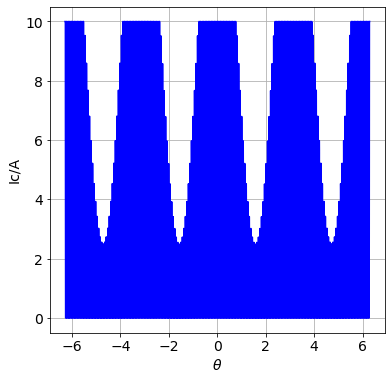

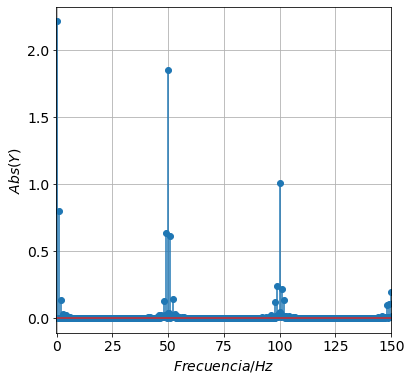

In [153]:
# Corriente de salida
ids = np.array([idi(v) for v in vgs])

plt.plot(th, ids,'b-')
#plt.axis([0, 4, 0, 4.5])
plt.grid()
plt.ylabel('Ic/A')
plt.xlabel('$\\theta$')
plt.show()

Y = fft(ids)/len(ids)  # Normalizada
#S = np.fft.fftshift(np.fft.fft(s))
#S_mag = np.abs(S)
#S_phase = np.angle(S)


frq = fftfreq(len(ids), ds)  # Recuperamos las frecuencias

plt.stem(frq, np.abs(Y) )  # Representamos la parte imaginaria
plt.xlim(-0.1, 150)
plt.xlabel('$Frecuencia/Hz$'); plt.ylabel('$Abs(Y)$')
plt.grid(); plt.show()

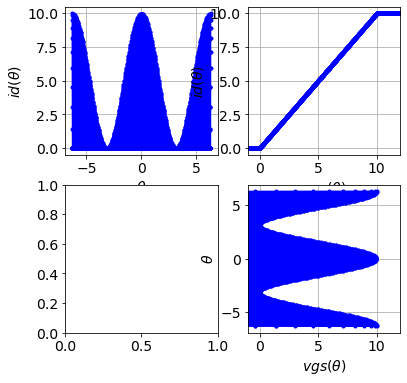

In [125]:
#Oscilogramas
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)


# Plot various projections of the samples.
ax1.plot(th, ids, 'b.-')
ax1.grid(True)
ax1.set(xlabel='$\\theta$', ylabel='$id(\\theta)$')


ax2.plot(vgsa, idsa, 'b.-')
ax2.grid(True)
ax2.set(xlabel='$vgs(\\theta)$', ylabel='$id(\\theta)$')
ax2.set(xlim=(-1, 12))

ax4.plot(vgs,th, 'b.-')
ax4.set(xlabel='$vgs(\\theta)$', ylabel='$\\theta$')
ax4.set
ax4.grid(True)
ax4.set(xlim=(-1, 12))

plt.show()


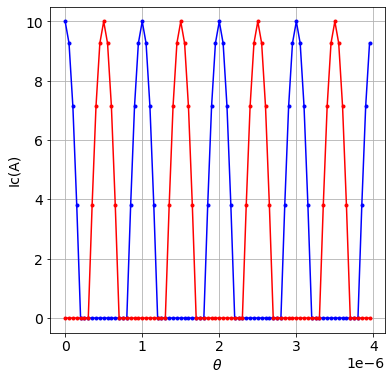

In [84]:
# Defino muestreo para graficar 
# La frecuencia maxima que muestra Fourier es fs/2
# Se busca que fuera de la zona de Nysquit las componentes armonicas sean despresiables
fs = 20*fc
ds = 1/fs

# vector de tiempo 
# Defino resolución espectral en frecuencia !
numT  = 4
T     = numT/fc
time  = np.arange(0,T,ds)


vgs1 = VGG + vg * np.cos(2*np.pi*fc*time)
vgs2 = VGG - vg * np.cos(2*np.pi*fc*time)

idst1 = np.array([idi(v) for v in vgs1])
idst2 = np.array([idi(v) for v in vgs2])


plt.plot(time, idst1,'b.-')
plt.plot(time, idst2,'r.-')

#plt.axis([0, 4, 0, 4.5])
plt.grid()
plt.ylabel('Ic(A)')
plt.xlabel('$\\theta$')
plt.show()


Id0_1 = 2.522 A
Id1_1 = 4.366 A
Id2_1 = 2.704 A
Id3_1 = 0.922 A


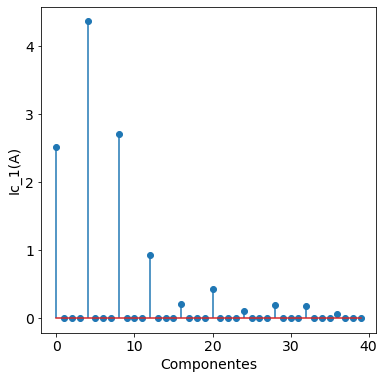

In [85]:
# Transformada Discreta de Fourier    
# Se calcula a modo ejemplo con objetivos didacticos (no es la forma optima!)
def DFT(x):
    N = len(x)
    X = list()
    for k in range(int(N/2)):
        a = 2*sum([s*np.cos(2*np.pi*n*k/N) for n,s in enumerate(x)])/N
        b = 2*sum([s*np.sin(2*np.pi*n*k/N) for n,s in enumerate(x)])/N
        if k == 0: X.append(a/2)
        else     : X.append(a+1j*b)
    return np.array(X) 

# Calculo las componentes de la serie de Fourier

Idsf1 = DFT(idst1)


Idsf2 = DFT(idst2)



print('Id0_1 = {:1.3f} A'.format(abs(Idsf1[0]   ) ) )
print('Id1_1 = {:1.3f} A'.format(abs(Idsf1[numT]) ) )
print('Id2_1 = {:1.3f} A'.format(abs(Idsf1[numT*2]   ) ) )
print('Id3_1 = {:1.3f} A'.format(abs(Idsf1[numT*3]) ) )
# Grafico
plt.stem(abs(Idsf1) )
plt.ylabel('Ic_1(A)')
plt.xlabel('Componentes')
plt.show()



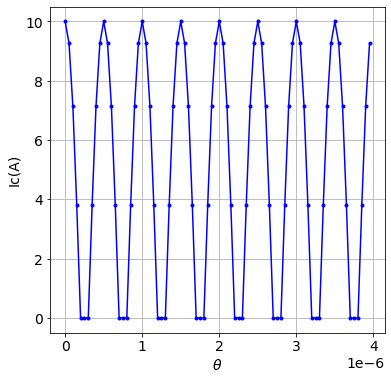

In [108]:
idsto = idst1+idst2 


plt.plot(time, idsto,'b.-')


#plt.axis([0, 4, 0, 4.5])
plt.grid()
plt.ylabel('Ic(A)')
plt.xlabel('$\\theta$')
plt.show()

Id0 = 5.044 A
Id1 = 0.000 A
Id2 = 5.409 A
Id3 = 0.000 A


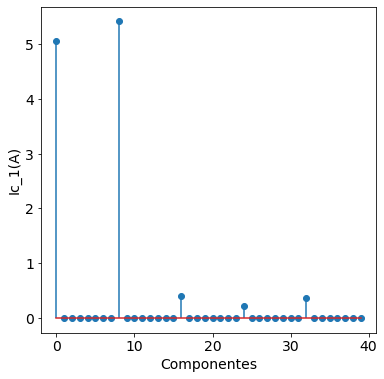

In [109]:
Idsfo = DFT(idsto)

print('Id0 = {:1.3f} A'.format(abs(Idsfo[0]   ) ) )
print('Id1 = {:1.3f} A'.format(abs(Idsfo[numT]) ) )
print('Id2 = {:1.3f} A'.format(abs(Idsfo[numT*2]   ) ) )
print('Id3 = {:1.3f} A'.format(abs(Idsfo[numT*3]) ) )
# Grafico
plt.stem(abs(Idsfo) )
plt.ylabel('Ic_1(A)')
plt.xlabel('Componentes')
plt.show()

/home/aalmela/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


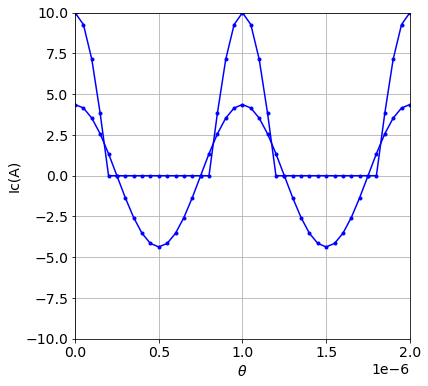

/home/aalmela/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


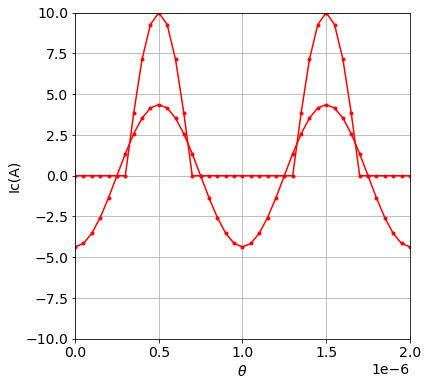

/home/aalmela/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


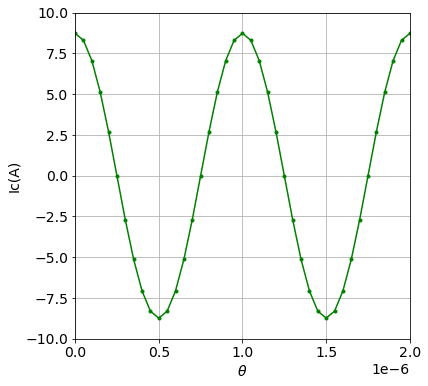

In [103]:
Id0_1 = Idsf[0]
Id0_2 = Idsf[0]


Id1_1 = Idsf1[numT  ].real * np.cos(2*np.pi*fc*time) + 1j * Idsf1[numT  ].imag * np.sin(2*np.pi*fc*time)
Id1_2 = Idsf2[numT  ].real * np.cos(2*np.pi*fc*time) + 1j * Idsf2[numT  ].imag * np.sin(2*np.pi*fc*time)
Vd2 = (Id1_1-Id1_2) * Rd 


plt.plot(time, idst1,'b.-')
plt.plot(time, Id1_1,'b.-')
plt.axis([0, 2*T/numT,-10, 10])
plt.grid()
plt.ylabel('Ic(A)')
plt.xlabel('$\\theta$')
plt.show()

plt.plot(time, idst2,'r.-')
plt.plot(time, Id1_2,'r.-')
plt.axis([0, 2*T/numT,-10, 10])
plt.grid()
plt.ylabel('Ic(A)')
plt.xlabel('$\\theta$')
plt.show()




plt.plot(time, Id1_1 - Id1_2,'g.-')
plt.axis([0, 2*T/numT,-10, 10])
plt.grid()
plt.ylabel('Ic(A)')
plt.xlabel('$\\theta$')
plt.show()




/home/aalmela/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


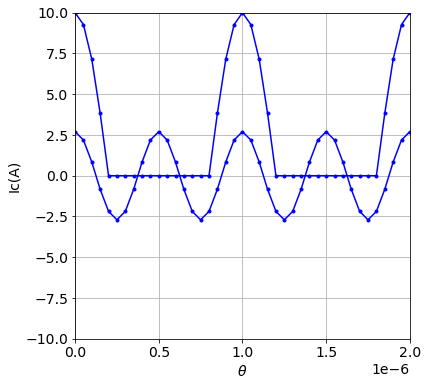

/home/aalmela/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


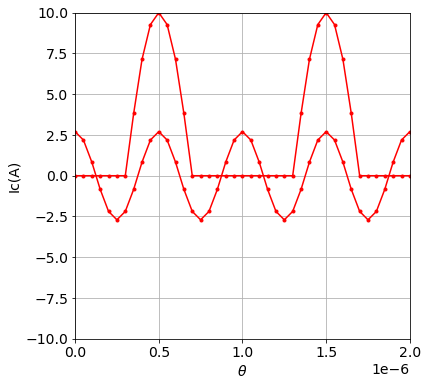

/home/aalmela/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


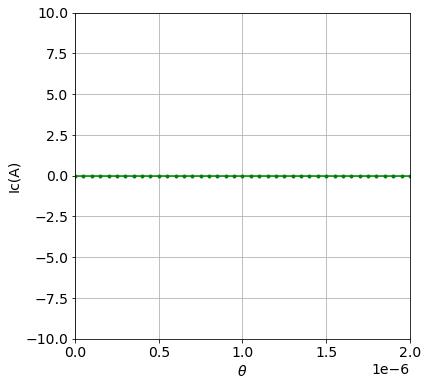

In [99]:
Id2_1 = Idsf1[2*numT].real * np.cos(2*np.pi*fc*2*time) + 1j * Idsf1[numT*2].imag * np.sin(2*np.pi*fc*2*time)
Id2_2 = Idsf2[2*numT].real * np.cos(2*np.pi*fc*2*time) + 1j * Idsf2[numT*2].imag * np.sin(2*np.pi*fc*2*time)
Vd2 = (Id2_1+Id2_2) * Rd / (1+Qc**2*(2/1-1/2)**2)**0.5


plt.plot(time, idst1,'b.-')
plt.plot(time, Id2_1,'b.-')
plt.axis([0, 2*T/numT,-10, 10])
plt.grid()
plt.ylabel('Ic(A)')
plt.xlabel('$\\theta$')
plt.show()

plt.plot(time, idst2,'r.-')
plt.plot(time, Id2_2,'r.-')
plt.axis([0, 2*T/numT,-10, 10])
plt.grid()
plt.ylabel('Ic(A)')
plt.xlabel('$\\theta$')
plt.show()



plt.plot(time, Id2_1 - Id2_2,'g.-')

plt.axis([0, 2*T/numT,-10, 10])
plt.grid()
plt.ylabel('Ic(A)')
plt.xlabel('$\\theta$')
plt.show()


/home/aalmela/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


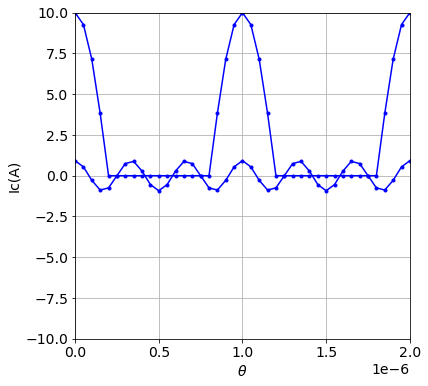

/home/aalmela/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


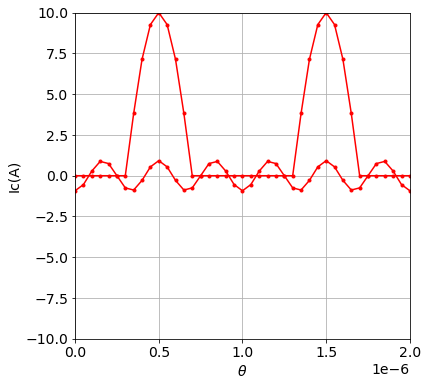

/home/aalmela/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


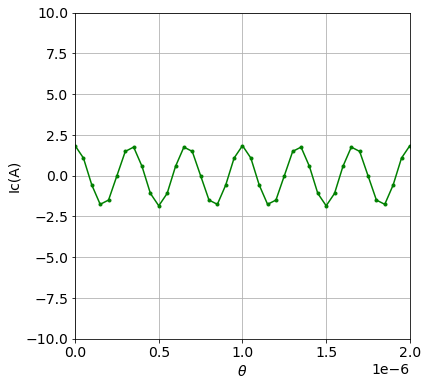

In [104]:
Id3_1 = Idsf1[3*numT].real * np.cos(2*np.pi*fc*3*time) + 1j * Idsf1[numT*3].imag * np.sin(2*np.pi*fc*3*time)
Id3_2 = Idsf2[3*numT].real * np.cos(2*np.pi*fc*3*time) + 1j * Idsf2[numT*3].imag * np.sin(2*np.pi*fc*3*time)

Vd3 = (Id3+Id3) * Rd / (1+Qc**2*(3/1-1/3)**2)**0.5


plt.plot(time, idst1,'b.-')
plt.plot(time, Id3_1,'b.-')
plt.axis([0, 2*T/numT,-10, 10])
plt.grid()
plt.ylabel('Ic(A)')
plt.xlabel('$\\theta$')
plt.show()

plt.plot(time, idst2,'r.-')
plt.plot(time, Id3_2,'r.-')
plt.axis([0, 2*T/numT,-10, 10])
plt.grid()
plt.ylabel('Ic(A)')
plt.xlabel('$\\theta$')
plt.show()



plt.plot(time, Id3_1 - Id3_2,'g.-')

plt.axis([0, 2*T/numT,-10, 10])
plt.grid()
plt.ylabel('Ic(A)')
plt.xlabel('$\\theta$')
plt.show()


In [107]:
# Calculo resistencia de carga para max excursion de salida
fc = 1e6
Rd  = (VDD -  Vmin)/(abs(Idsf[numT])*2) 

print(Rd)

L1   = (1/Qc-1/Qo)*Rd/(2*np.pi*fc)

C   = 1/(L*(2*np.pi*fc)**2)

print('.param RL = {:1.2f}'.format(abs(RL)))

print('.param L1 = {:1.4e}'.format(abs(L1)))
print('.param C = {:1.4e}'.format(abs(C)))

N1N2 = (Rd/RL)**0.5



L2 = (N1N2)**2 * L1 

print('.param L2 = {:1.4e}'.format(abs(L2)))

L3  = Ri/(2*np.pi*fc)*100
print('.param L3 = {:1.4e}'.format(abs(L3)))


11.453004342371312
.param RL = 50.00
.param L1 = 1.8228e-07
.param C = 1.3896e-07
.param L2 = 4.1753e-08
.param L3 = 7.9577e-04
